# Introduction to Modern Mathematical Modeling
# Chapter 5; Mathematical Modeling By Linear Algebra

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from sympy import linsolve, symbols
import warnings
warnings.filterwarnings("ignore")

In [3]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

### Kirchoff's Law & Electrical Circuits
Given a circuit diagram like the one on page 84, an understanding of Ohm's
Law and Kirchoff's Law can allow for the creation of a linear system to find
the current along each wire. Once you have that, `numpy`'s linear algebra suite
can be used to solve the system. The code below gives the solution $\vec{x}$
to the system:
$$A\vec{x} = \vec{b}$$

In [4]:
A = np.array([1, 8, 0, -1, 0, 6, 1, -3, 3]).reshape(3,3, order='F')
b = np.array([0, 10, 15])
x = np.linalg.solve(A,b)
print(f"Solution to Ax = b: x = {x}")

Solution to Ax = b: x = [1.5        2.16666667 0.66666667]


After finding $\vec{x}$ you can also use numpy to check the result.

In [5]:
print(f"A@x = {A@x}")

A@x = [ 0. 10. 15.]


### Mass Balance for Chemical Reactions
In photosynthesis, plants convert energy they receive from the sun, carbon
dioxide, and water into glucose. The expression that represents this chemical
reaction is given by:
$$CO_2 + H_2O \to C_6H_{12}O_6 + O_2$$
While this expression relates the chemicals that exist before and after the
reaction, we need a mathematical equation to determine how many of each
molecule was involved in the process:
$$x_1CO_2 + x_2H_2O = x_3C_6H_{12}O_6 + x_4O_2$$
Here $x_i,\ i \in \{1,2,3,4\}$, are integers that represent the number of each
molecule in the reaction. The number of atoms on the left and right side of
the equals sign must be constant, due to Conservation of Mass. So we can
leverage that here, as we know how many of each type of atom are in each
molecule. Constructing a linear system from this gives:
\begin{align*}
x_1 &= 6x_3 \\
2x_2 &= 12x_3 \\
2x_1 + x_2 &= 6x_3 + 2x_4
\end{align*}
Each of these equations can b solved in terms of one of variables,
so this system is
under-determined and has infinitely many solutions. That fact might be a
little surprising or, perhaps, even counter-intuitive; until you consider
that the parameterized solution effectively represents the number of
reactions that take place. The python solvers we've already seen won't
work on an undetermined system, though, so to solve this one we'll use
functions from the `sympy` library.

In [6]:
x1, x2, x3, x4 = symbols('x1, x2, x3, x4')
solution = linsolve([x1 -6*x3, 2*x2 -12*x3, 2*x1+ 1*x2 -6*x3 -2*x4],
                    (x1,x2,x3,x4))
print(f"Vector of solutions:")
solution

Vector of solutions:


FiniteSet((x4, x4, x4/6, x4))

As already stated, this system's solution was bound to be parameterized,
and `linsolve` has given us a parameterization in terms of $x_4$. `linsolve`
makes no distinction between types of parameters and because components of
this solution are meant to be whole numbers, we should instead consider letting
$x_4 = 6t,\ t \in \mathbb{N}$ to be sure we are only dealing with whole numbers
of molecules.

### Leontif Production Model

In [7]:
L = np.array([[0.3, 0.2, 0.2],[0.2, 0.2, 0.1],[0.3, 0.2, 0.3]])
I = np.identity(3)
d = np.array([3000, 500, 1500])

x1 = np.linalg.solve(I-L, d)
print(f"Solution to (I-L)x1 = d: x1 = {x1}")

Solution to (I-L)x1 = d: x1 = [6875.         3090.27777778 5972.22222222]


### SVD: space-time-energy separation for time-series data

In [8]:
A1 = np.array([[1, 0, -1],[1, -1, 0]])

u, s, v = np.linalg.svd(A1, full_matrices=False)
# full_matrices=False gives us the reduced U and V
# matrices, which are smaller and easier to work
# with.

print(f"Left-Singular u:\n{u}")
print(f"Singular values of A1: {s}")
print(f"Right-Singular v: {v}")

print(f"\nU@S@V =\n{np.round(u@np.diag(s)@v)}")
# np.round rounds floats to the nearest integer, it also supports
# rounding to an arbitrary decimal precision.

Left-Singular u:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Singular values of A1: [1.73205081 1.        ]
Right-Singular v: [[ 8.16496581e-01 -4.08248290e-01 -4.08248290e-01]
 [ 4.40677305e-16 -7.07106781e-01  7.07106781e-01]]

U@S@V =
[[ 1.  0. -1.]
 [ 1. -1.  0.]]


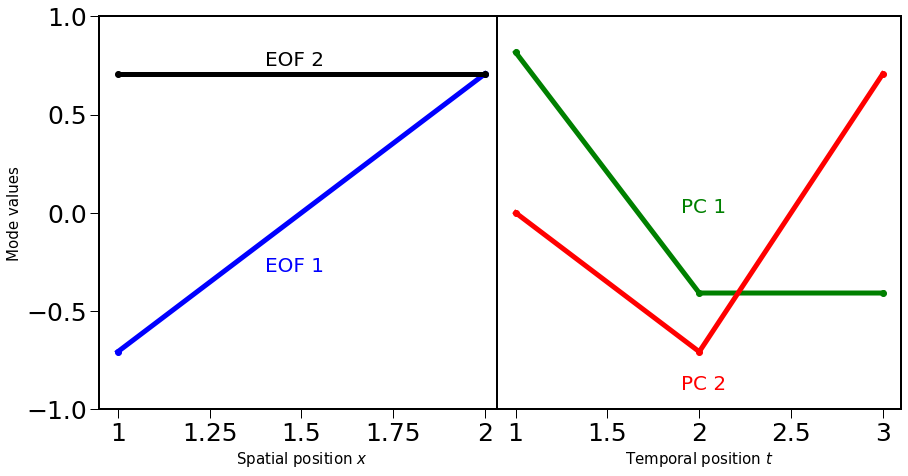

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(np.arange(u.shape[1])+1, u[:,1],
           'bo-', label = "EOF 1", linewidth = 5)
ax[0].plot(np.arange(u.shape[1])+1, u[:,0],
           'ko-', label = "EOF 2", linewidth = 5)

ax[0].set_ylim(-1, 1)
ax[0].text(1.4, -0.3, "EOF 1", color = 'blue', size = 20)
ax[0].text(1.4, 0.75, "EOF 2", color = 'black', size = 20)

ax[0].set_xlabel("Spatial position $x$", size = 15)
ax[0].set_ylabel("Mode values", size = 15)

ax[0].set_xticks([1, 1.25, 1.5, 1.75, 2])
ax[0].set_xticklabels([1, 1.25, 1.5, 1.75, 2])
# set_xticks allows you to choose where ticks show coordinate-wise
# along the x-axis, set_xticklabels sets the labels associated with
# those ticks, sequentially. y-axis counterparts also exist:
# set_yticks, set_yticklabels


ax[1].plot(np.arange(v.shape[1])+1, v[0,:],
           'go-', label = "PC1", linewidth = 5)
ax[1].plot(np.arange(v.shape[1])+1, v[1,:],
           'ro-', label = "PC2", linewidth = 5)

ax[1].set_ylim(-1, 1)
ax[1].text(1.9, 0, "PC 1", color = 'green', size = 20)
ax[1].text(1.9, -0.9, "PC 2", color = 'red', size = 20)

ax[1].set_xlabel("Temporal position $t$", size = 15)
ax[1].set_xticks([1, 1.5, 2, 2.5, 3])
ax[1].set_xticklabels([1, 1.5, 2, 2.5, 3])

ax[1].axes.get_yaxis().set_visible(False)
# axes.get_yaxis().set_visible lets us change the y-axis' visibility.
# We want it gone here, because we're using the same y ticks from
# ax[0] and there wouldn't be room between the plots anyways. An
# x-axis counterpart also exists: axes.get_xaxis().set_visible

fig.tight_layout(pad=-1.5)


plt.savefig("CH5;EOFs&PCs.jpg")

In [10]:
np.random.seed(100)
dat = np.random.standard_normal(size=(10*15, 20))
# np.random.standard_normal creates an array of random values in the
# standard_normal distribution, size specifies the array's dimensions.

x = np.arange(10) + 1
y = np.arange(15) + 1
# Adding 1 to each of these numpy ranges increments each element
# by 1. Remember vectorization!

u1, s1, v1 = np.linalg.svd(dat, full_matrices=False)

umat = u1[:,0].reshape(15, 10, order='F')
# reshape lets you change the numpy array's dimensions to the
# dimensions specified. order is the way in which elements are
# taken from the original and added to the newly shaped array.
# 'F' is for Fortran-like (column major).

clev = np.linspace(umat.min(), umat.max(), 25)
# The number of levels we want for the contourf below.

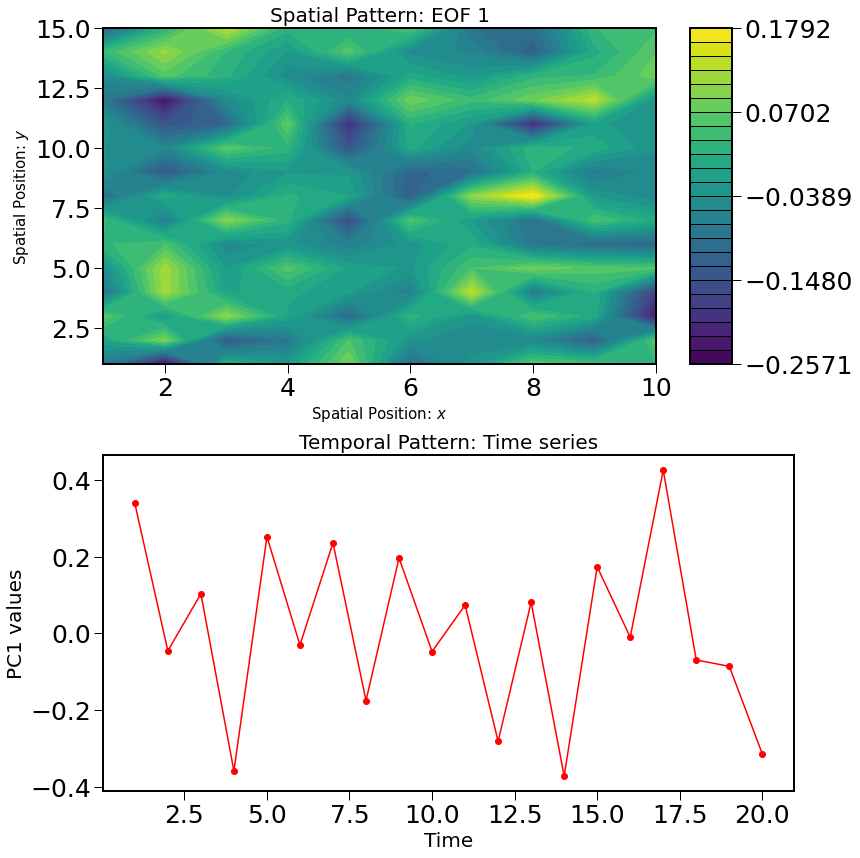

In [11]:
fig = plt.figure(figsize=(12,12))
# This simply creates the figure, the other plot stuff is
# below.

ax1 = plt.subplot2grid((2,1), (0,0))
# This implicitly creates a 2 by 1 array of plots in fig, and
# ax1 refers to the first. This way of declaring the plot has
# to be used instead of ways already articulated, because the
# colorbar on the contourf plot is incompatible with the old
# way. This method, however, is compatible.

contf = ax1.contourf(x, y, umat, clev)
colbar = plt.colorbar(contf, drawedges=True, aspect=8)
colbar.set_ticks(np.linspace(umat.min(), umat.max(), 5))
# This sets the ticks that show up on the colorbar manually,
# mush like setting the ticks on the axes manually.

ax1.set_xlabel("Spatial Position: $x$", size = 15)
ax1.set_ylabel("Spatial Position: $y$", size = 15)
ax1.set_title("Spatial Pattern: EOF 1", size=20)

ax2 = plt.subplot2grid((2,1), (1,0))
# This creates the second plot in our 2 by 1 array of plots.
# ax2 is the second.

ax2.plot(np.arange(v1.shape[0]) + 1, v1[:,0], 'ro-')
ax2.set_xlabel("Time", size = 20)
ax2.set_ylabel("PC1 values", size = 20)
ax2.set_title("Temporal Pattern: Time series", size=20)

fig.tight_layout(pad=1)

fig.savefig("CH5;Spatial&TemporalPatterns.jpg", bbox_inches='tight')

In [12]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pta = pd.read_csv("PSTANDtahiti.txt", sep="\s+", index_col=0, names=months)
# Here we use pd.read_csv to read a text file, using column 0 as the
# label for each row, and using the months list as labels for the columns

ptamonv = np.array(pta).reshape(780, 1)

In [13]:
pda = pd.read_csv("PSTANDdarwin.txt", sep="\s+", index_col=0, names=months)
pdamonv = np.array(pda).reshape(780, 1)
# In this cell, we do the same as the cell above, but with a different
# text file.

In [14]:
ptada = np.append(ptamonv,pdamonv, axis=1).T
# np.append combines lists/arrays into one by adding the elements
# of the second to the end of the first. Specifying the axis, lets
# you determine how they'll be added to each other. In this case,
# appending one array of shape (1, 780) to another array of the
# same shape along axis 0 yields an array of shape (2, 780). Note
# that appending it like that requires that each arrays dimension
# 2 must be equal.

print(f"Shape of ptada: {ptada.shape}")

u2, s2, v2 = np.linalg.svd(ptada, full_matrices=False)

print(f"Shape of Left-Singular u: {u2.shape},\n"
      f"Shape of Singular Values array s: {s2.shape},\n"
      f"Shape of Right-Singular v: {v2.shape}")


Shape of ptada: (2, 780)
Shape of Left-Singular u: (2, 2),
Shape of Singular Values array s: (2,),
Shape of Right-Singular v: (2, 780)


In [15]:
xtime = np.arange(1951, 2016 - 1/12, 1/12)
# xtime represents all months from January 1951 to December 2015

wsoi1 = s2[0]*v2[0]
wsoi2 = s2[1]*v2[1]
# Vectorized product of singular values with corresponding PCs.

cwsoi1 = np.cumsum(wsoi1)
cwsoi2 = np.cumsum(wsoi2)
# np.cumsum does the cumulative sum of each element in the array,
# and returns an array of the same length where element i is the
# sum of all elements up to i in the original array.

cnegsoi = np.cumsum(pdamonv-ptamonv)

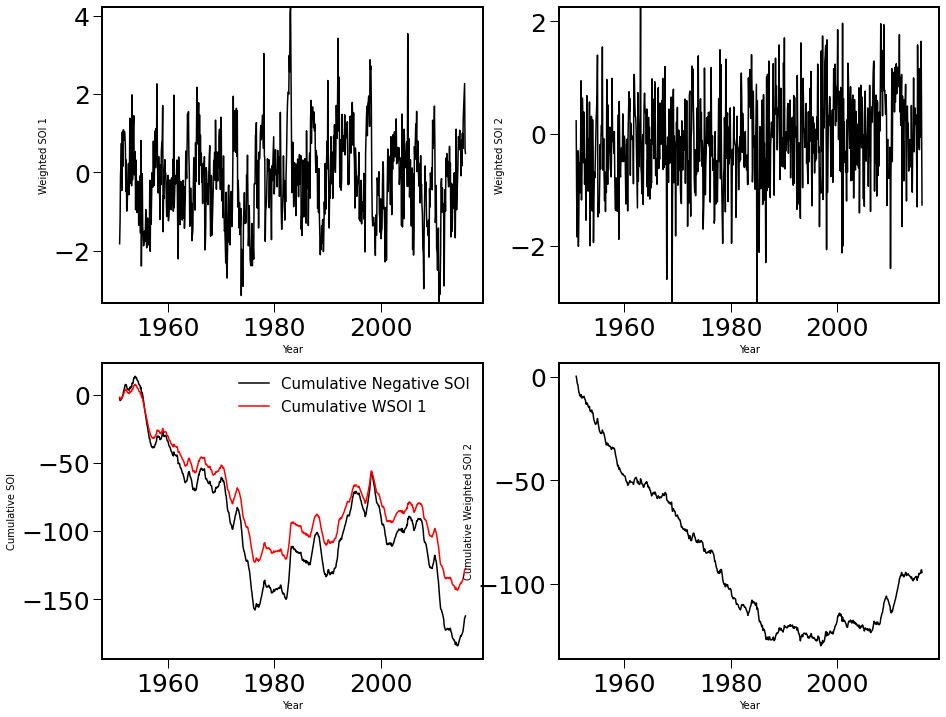

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
# We're not limited to n by 1 dimensional arrays of plots.
# This figure has 4 plots in a 2 by 2 arrangement.

ax[0,0].plot(xtime, wsoi1, 'k-')
ax[0,0].set_xlabel("Year", size=10)
ax[0,0].set_ylabel("Weighted SOI 1", size=10)
ax[0,0].set_ylim(wsoi1.min(), wsoi1.max())

ax[0,1].plot(xtime, wsoi2, 'k-')
ax[0,1].set_xlabel("Year", size=10)
ax[0,1].set_ylabel("Weighted SOI 2", size=10)
ax[0,1].set_ylim(wsoi2.min(), wsoi2.max())

ax[1,0].plot(xtime, cnegsoi, 'k-', label="Cumulative Negative SOI")
ax[1,0].plot(xtime, cwsoi1, 'r-', label="Cumulative WSOI 1")
ax[1,0].set_xlabel("Year", size=10)
ax[1,0].set_ylabel("Cumulative SOI", size=10)
ax[1,0].legend(loc='best')

ax[1,1].plot(xtime, cwsoi2, 'k-')
ax[1,1].set_xlabel("Year", size=10)
ax[1,1].set_ylabel("Cumulative Weighted SOI 2", size=10);

plt.savefig("CH5;DarwinTahitiSOI.jpg")

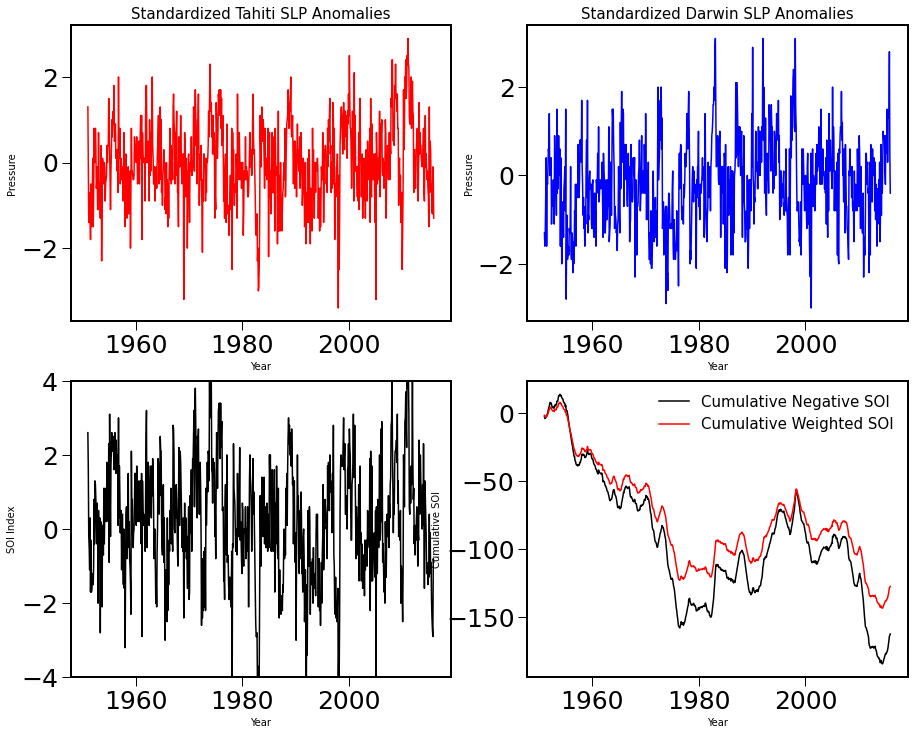

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ax[0,0].plot(xtime, ptamonv, 'r-')
ax[0,0].set_xlabel("Year", size=10)
ax[0,0].set_ylabel("Pressure", size=10)
ax[0,0].set_title("Standardized Tahiti SLP Anomalies", size=15)

ax[0,1].plot(xtime, pdamonv, 'b-')
ax[0,1].set_xlabel("Year", size=10)
ax[0,1].set_ylabel("Pressure", size=10)
ax[0,1].set_title("Standardized Darwin SLP Anomalies", size=15)

ax[1,0].plot(xtime, ptamonv-pdamonv, 'k-')
ax[1,0].set_xlabel("Year", size=10)
ax[1,0].set_ylabel("SOI Index", size=10)
ax[1,0].set_ylim(-4, 4)

ax[1,1].plot(xtime, cnegsoi, 'k-', label="Cumulative Negative SOI")
ax[1,1].plot(xtime, cwsoi1, 'r-', label="Cumulative Weighted SOI")
ax[1,1].set_xlabel("Year", size=10)
ax[1,1].set_ylabel("Cumulative SOI", size=10);
ax[1,1].legend(loc='upper right')

plt.savefig("CH5;DarwinTahitiSLPAnom.jpg")

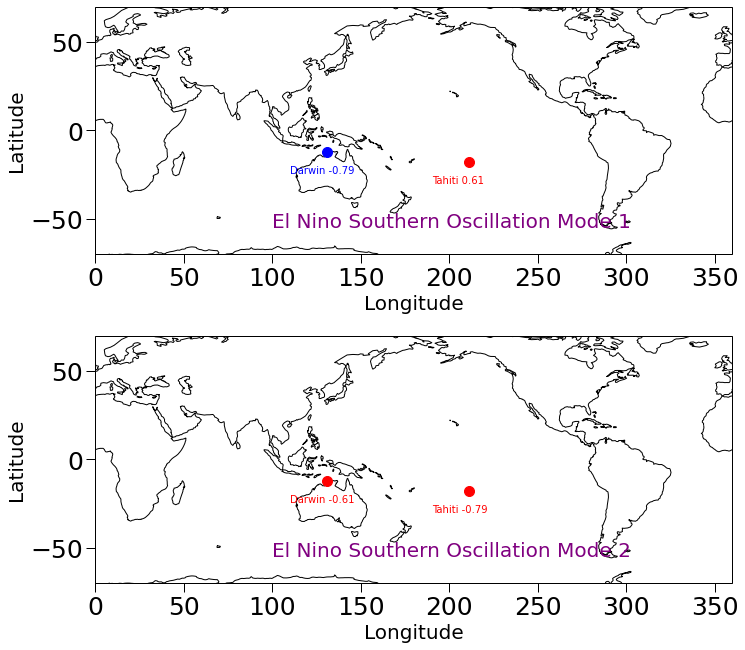

In [18]:
fig, ax = plt.subplots(nrows=2,figsize=(18,9))

# Top map projection
ax[0] = plt.subplot(2, 1, 1,
                    projection=cartopy.crs.PlateCarree(central_longitude=180))
# projection lets you change the nature of the plot. In this
# case, the plot is turned into a cartopy projection of the
# world. cartopy is a python package that allows for
# cartographic plotting.

ax[0].set_extent([0,359, -70, 70])
# set_extent lets you set the 'window' of the projection.
# The first 2 numbers are the min and max longitude, and
# the second 2 numbers are the min and max latitude.

ax[0].coastlines()
# coastlines draws the coasts of the landmasses within the window.

ax[0].plot(131-180, -12, 'bo', ms=10)
ax[0].text(110-180, -24, f"Darwin {-u2[1,0]:3.2f}", color='b')
ax[0].plot(211-180, -18, 'ro', ms=10)
ax[0].text(190-180, -30, f"Tahiti {-u2[0,0]:3.2f}", color='r')
ax[0].text(-80, -55, "El Nino Southern Oscillation Mode 1",
           color='purple', size=20)
# You can add as much floating text to a plot as you want.

ax[0].set_xticks([0, 50, 100, 150, 200, 250, 300, 350],
                 crs=cartopy.crs.PlateCarree())
# When setting the x and y ticks for a projection, you must include
# the crs type as well.

ax[0].set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350])
ax[0].set_xlabel("Longitude")

ax[0].set_yticks([-50, 0, 50], crs=cartopy.crs.PlateCarree())
ax[0].set_ylabel("Latitude")


# Bottom map projection. Most of the modifications to the top
# one are used again here.
ax[1] = plt.subplot(2, 1, 2,
                    projection=cartopy.crs.PlateCarree(central_longitude=180))
ax[1].set_extent([0,359, -70, 70])
ax[1].coastlines()
ax[1].plot(131-180, -12, 'ro', ms=10)
ax[1].text(110-180, -24, f"Darwin {-u2[1,1]:3.2f}", color='r')
ax[1].plot(211-180,-18, 'ro', ms=10)
ax[1].text(190-180, -30, f"Tahiti {-u2[1,0]:3.2f}", color='r')
ax[1].text(-80, -55, "El Nino Southern Oscillation Mode 2", color='purple', size=20)

ax[1].set_xticks([0, 50, 100, 150, 200, 250, 300, 350],
                 crs=cartopy.crs.PlateCarree())

ax[1].set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350])
ax[1].set_xlabel("Longitude")

ax[1].set_yticks([-50, 0, 50], crs=cartopy.crs.PlateCarree())
ax[1].set_ylabel("Latitude")


fig.tight_layout(pad=-1)

plt.savefig("CH5;OscillationModesDarwinTahiti.jpg")

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       